# Computer Vision

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transforms` - functions for manipulating vision data to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Create a Python iterable over a dataset

In [1]:
import torch
from torch import nn
print(torch.__version__)

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
print(torchvision.__version__)

import matplotlib.pyplot as plt

2.1.0+cu118
0.16.0+cu118


## 1. Getting a dataset

The dataset is FashionMNIST from torchvision.datasets

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(root="data", # where to download data
                                   train=True, # do we want the training dataset?
                                   download= True, # do we want to download?
                                   transform=ToTensor(), # how do we want to transform the data?
                                   target_transform=None) # how do we want to transform the labels?

test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

100%|██████████| 26421880/26421880 [00:01<00:00, 18068765.93it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 314457.20it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5003728.35it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11658896.86it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape of the first image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2. Visualizing the data

Image shape: torch.Size([1, 28, 28])


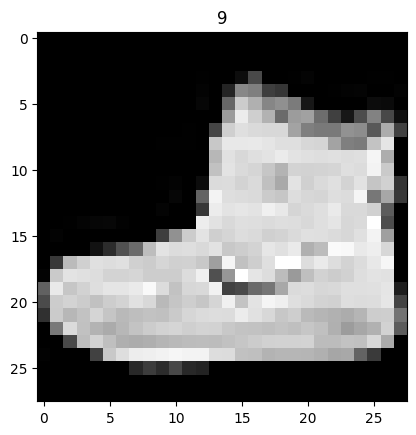

In [9]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze(), cmap="gray")
plt.title(label);

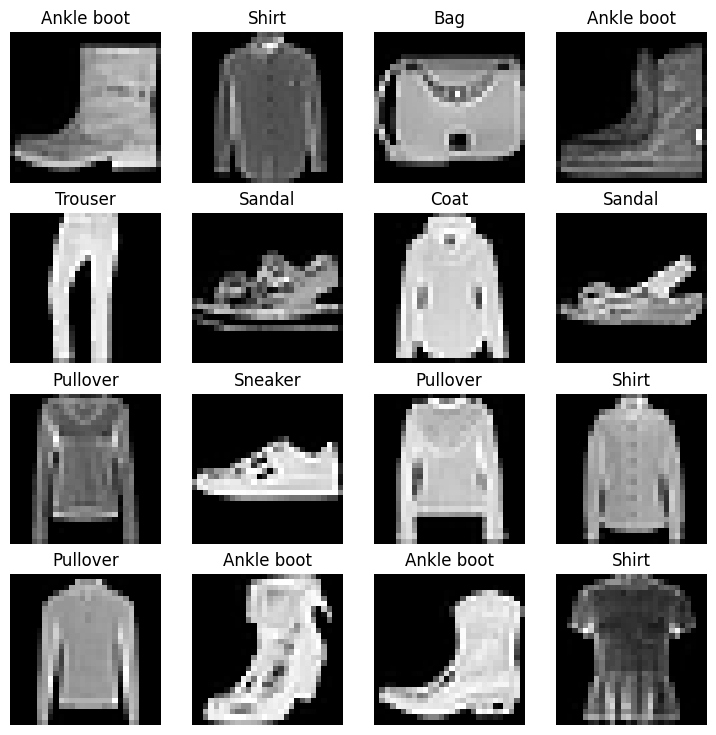

In [10]:
# Plot random images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=(1,)).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## 2. Prepare DataLoader
DataLoader turns dataset into a Python iterable.

More specifically, we want to turn the data into batches (or mini-batches).
1. It is more computationally efficient, as in, computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batches of 32).
2. It gives neural network more chances to update its gradients per epoch.

In [11]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [12]:
# Check out the data
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Lenngth of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7dc3d3cdb6d0>, <torch.utils.data.dataloader.DataLoader object at 0x7dc3d3cdb3a0>)
Length of train_dataloader: 1875 batches of 32
Lenngth of test_dataloader: 313 batches of 32


In [13]:
# Check inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, Label size: torch.Size([])


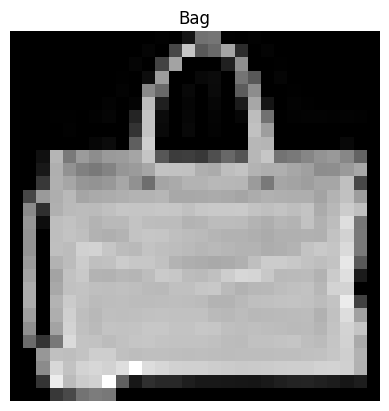

In [14]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=(1,)).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, Label size: {label.shape}")

## 3. Model 0: Build a baseline model

A baseline model is a simple model to try and improve upon subsequent models/experiments.

In other words, start simply and add complexity when necessary.

In [15]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [16]:
torch.manual_seed(42)

# Setup models with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=8,
    output_shape=len(class_names)
).to("cpu")

In [17]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0147,  0.0067,  0.0311,  ...,  0.0036,  0.0215,  0.0092],
                      [ 0.0228,  0.0005,  0.0119,  ...,  0.0109, -0.0325, -0.0075],
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011]])),
             ('layer_stack.1.bias',
              tensor([-0.0230,  0.0257,  0.0291,  0.0243, -0.0006,  0.0088,  0.0018, -0.0136])),
             ('layer_stack.2.weight',
              tensor([[-0.3501, -0.0432,  0.1529,  0.2062,  0.0841,  0.1612,  0.2213, -0.0684],
                      [ 0.2309, -0.0074, -0.1252, -0.1373, -0.2061, -0.2723,  0.0810,  0.3267],
                      [ 0.0503,  0.0478, -0.1326, -0.1394, -0.110

### 3.1. Setup loss, optimizer, and evaluation metrics

* Loss function - `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SGD()` or `torch.optim.Adam()`
* Evaluation metric - accuracy

In [18]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 5.8 MB/s eta 0:00:00


In [19]:
import requests
from pathlib import Path

# Download helper functions
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download..")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/almosenja/PyTorch/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [20]:
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to("cpu")

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2. Creating a function to time experiments

In [21]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

### 3.3. Creating a training loop and training a model on batches of data
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out.
5. Time it all.

In [22]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 5

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss, train_acc = 0, 0

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # 3. Calculate accuracy
    acc = accuracy_fn(torch.softmax(y_pred, dim=1).argmax(dim=1), y)
    train_acc += acc

    # 4. Optimizer zero grad
    optimizer.zero_grad()

    # 5. Loss backward
    loss.backward()

    # 6. Optimizer step
    optimizer.step()

    # Print out
    if batch % 400 == 0:
      print(f"   Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Devide total train loss and accuracy by length of train dataloader
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(torch.softmax(test_pred, dim=1).argmax(dim=1),
                              y_test)

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out
  print(f"Train loss: {train_loss:.4f}, Train acc: {100*train_acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {100*test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
   Looked at 0/60000 samples.
   Looked at 12800/60000 samples.
   Looked at 25600/60000 samples.
   Looked at 38400/60000 samples.
   Looked at 51200/60000 samples.
Train loss: 0.6046, Train acc: 78.35% | Test loss: 0.5061, Test acc: 82.10%

Epoch: 1
------
   Looked at 0/60000 samples.
   Looked at 12800/60000 samples.
   Looked at 25600/60000 samples.
   Looked at 38400/60000 samples.
   Looked at 51200/60000 samples.
Train loss: 0.4823, Train acc: 83.12% | Test loss: 0.4864, Test acc: 82.86%

Epoch: 2
------
   Looked at 0/60000 samples.
   Looked at 12800/60000 samples.
   Looked at 25600/60000 samples.
   Looked at 38400/60000 samples.
   Looked at 51200/60000 samples.
Train loss: 0.4604, Train acc: 83.88% | Test loss: 0.4870, Test acc: 83.32%

Epoch: 3
------
   Looked at 0/60000 samples.
   Looked at 12800/60000 samples.
   Looked at 25600/60000 samples.
   Looked at 38400/60000 samples.
   Looked at 51200/60000 samples.
Train loss: 0.4478, Train acc: 84.26% | T

## 4. Make predictions and get Model 0 results

In [23]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device="cpu"):

  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make data device agnostic
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(torch.softmax(y_pred, dim=1).argmax(dim=1),
                         y)

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc.item()*100}

In [24]:
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device="cpu")
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4732349216938019,
 'model_acc': 83.23681950569153}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [25]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building model with non-linearity

In [26]:
# Create a model with non-linear layer
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

In [27]:
torch.manual_seed(42)

# Setup models with input parameters
model_1 = FashionMNISTModelV1(
    input_shape=28*28,
    hidden_units=8,
    output_shape=len(class_names)
).to(device)

### 6.1. Setup loss, optimizer, and evaluation metrics

In [28]:
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2. Functionizing training and evaluation/testing loops
Create function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [29]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device="cpu"):

  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for X, y in data_loader:
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss/acc
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {100*train_acc:.2f}%")

In [30]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device="cpu"):

  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(y_pred, y)
      test_acc += accuracy_fn(y_pred.argmax(dim=1), y)

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test acc: {100*test_acc:.2f}%\n")

In [31]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start = timer()

# Set epochs
epochs = 5

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end = timer()
total_train_time_model_1 = print_train_time(start=train_time_start,
                                            end=train_time_end,
                                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.91913 | Train acc: 66.24%
Test loss: 0.73198 | Test acc: 72.89%

Epoch: 1
------
Train loss: 0.61420 | Train acc: 77.61%
Test loss: 0.50056 | Test acc: 81.80%

Epoch: 2
------
Train loss: 0.46734 | Train acc: 83.34%
Test loss: 0.50745 | Test acc: 82.43%

Epoch: 3
------
Train loss: 0.45072 | Train acc: 83.89%
Test loss: 0.46860 | Test acc: 83.23%

Epoch: 4
------
Train loss: 0.44036 | Train acc: 84.22%
Test loss: 0.47480 | Test acc: 83.10%

Train time on cuda: 83.300 seconds


In [32]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [33]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4748002588748932,
 'model_acc': 83.09704065322876}

## 7. Model 2: Building a Convolutional Neural Network (CNN)

In [34]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the Tiny VGG
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [35]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

### 7.1. Setup a loss function and optimizer for Model 2

In [36]:
# Setup loss function/eval metrics/optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

### 7.2. Training and testing Model 2

In [37]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start = timer()

# Train and test model
epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end = timer()
total_train_time_model_2 = print_train_time(start=train_time_start,
                                            end=train_time_end,
                                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.59710 | Train acc: 78.35%
Test loss: 0.40369 | Test acc: 85.73%

Epoch: 1
------
Train loss: 0.36448 | Train acc: 86.85%
Test loss: 0.37017 | Test acc: 86.40%

Epoch: 2
------
Train loss: 0.32579 | Train acc: 88.28%
Test loss: 0.32915 | Test acc: 88.03%

Epoch: 3
------
Train loss: 0.30451 | Train acc: 89.03%
Test loss: 0.33615 | Test acc: 87.72%

Epoch: 4
------
Train loss: 0.28931 | Train acc: 89.57%
Test loss: 0.30461 | Test acc: 88.97%

Train time on cuda: 102.695 seconds


In [38]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [39]:
model_0_results, model_1_results, model_2_results

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.4732349216938019,
  'model_acc': 83.23681950569153},
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.4748002588748932,
  'model_acc': 83.09704065322876},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.30461427569389343,
  'model_acc': 88.96765112876892})

## 8. Compare model results and training time

In [40]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.473235,83.236820
1,FashionMNISTModelV1,0.474800,83.097041
2,FashionMNISTModelV2,0.304614,88.967651


In [43]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

In [44]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.473235,83.236820,70.806161
1,FashionMNISTModelV1,0.474800,83.097041,83.300255
2,FashionMNISTModelV2,0.304614,88.967651,102.695218


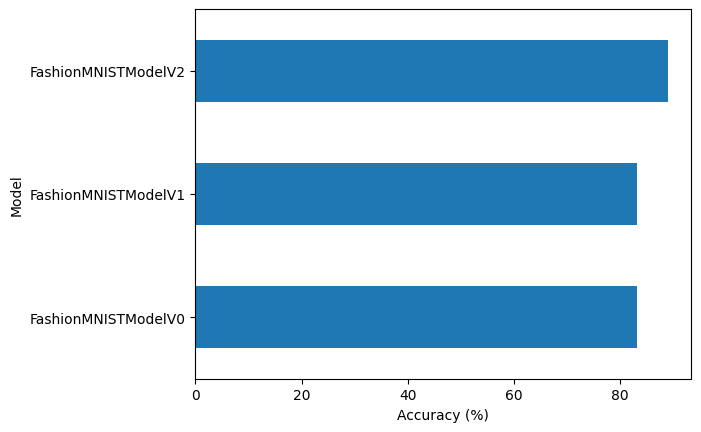

In [45]:
# Visualize model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model");

## 9. Make and evaluate random predictions with best model

In [46]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device="cpu"):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pas to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [72]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

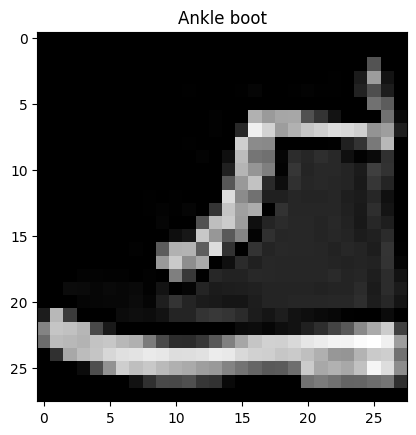

In [73]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]]);

In [74]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[3.2007e-06, 6.7911e-07, 5.6933e-06, 9.1900e-06, 3.9676e-06, 1.1297e-02,
         1.0602e-05, 1.2932e-02, 7.0777e-03, 9.6866e-01],
        [7.4959e-06, 1.8656e-07, 1.4650e-05, 5.2108e-07, 1.8529e-07, 3.5331e-04,
         8.7920e-07, 9.7790e-01, 5.8729e-04, 2.1133e-02]])

In [75]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

In [76]:
test_labels

[9, 7, 2, 0, 1, 0, 4, 5, 4]

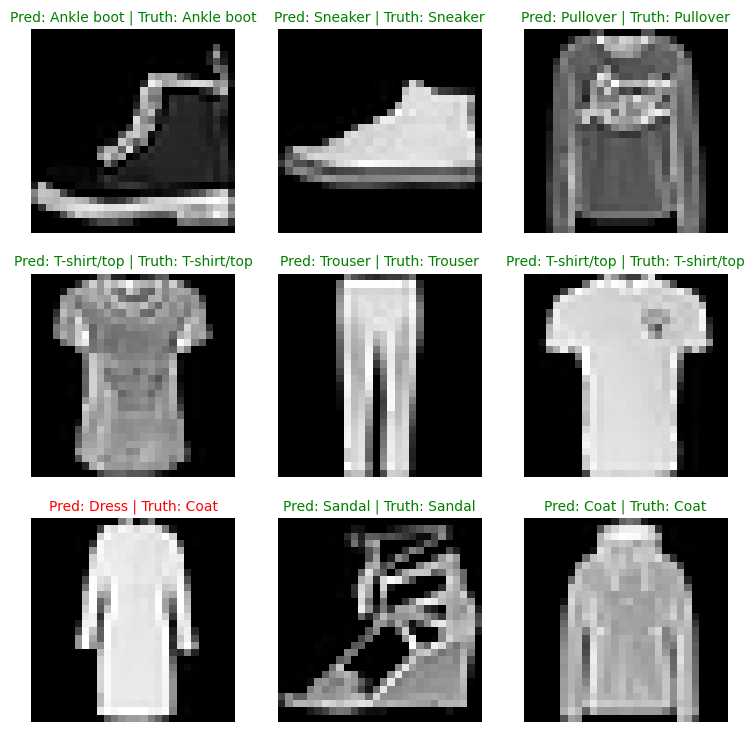

In [77]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation
1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [81]:
# 1. Make predictions with trained model
y_preds = []
model_2.to(device)
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [82]:
# See if required packages are installed and if not, install
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.2 MB/s eta 0:00:00
mlxtend version: 0.22.0


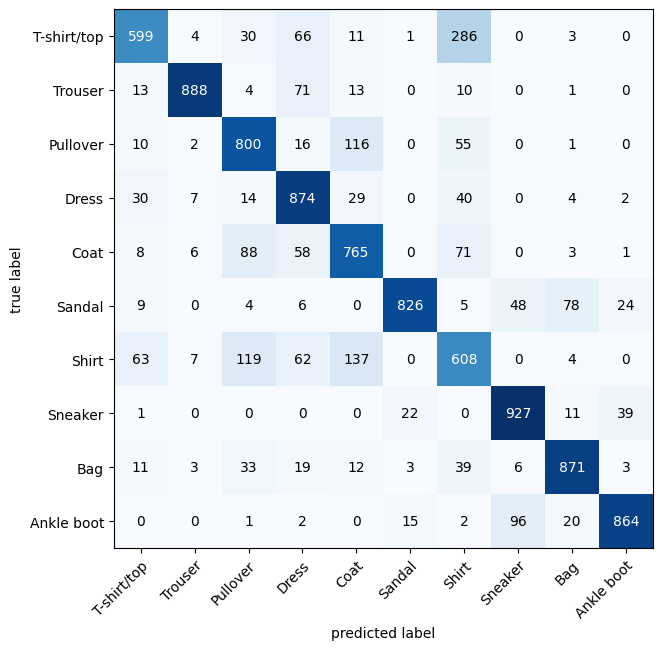

In [104]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = confusion_matrix(test_data.targets, y_pred_tensor)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                class_names=class_names,
                                figsize=(10, 7))

## 11. Save and load best performing model

In [105]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pt


In [106]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)